## XGBoost Model parameter tuning and evalution using Gridsearch
USA World Series Results,
Run on "Diff" data

# @To Do

- [ ] Look at scaling or normalizing data
- [ ] Look at Neural Networks
- [ ] Resolve issue of target being numeric or string label
- [ ] Explore relationship between Posession Time + Attacking Rucks + Passes

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [125]:
#Import Data - USA's differential data
df = pd.read_csv('../data/output/new_features_diffdata.csv')
#Import validation data
valdf = pd.read_csv('../data/output/new_features_diffdata_validate.csv')
df.head()

,Opp,Tournament,Poss_Time_Diff,Score_Diff,Conv_Diff,Tries_Diff,Passes_Diff,Contestable_KO_Win_pct_Diff,PenFK_Against_Diff,RuckMaul_Diff,...,-99 : -75,-74 : -25,-24 : -1,0 : 25,26 : 50,51 : 75,76 : 100,101 : 125,126 : 150,Result
0,AUSTRALIA,2015_Cape_Town,13.966480,-10.638298,-14.285714,0.250000,25.925926,-50.000000,0.000000,0.000000,...,0.0,-12.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,WALES,2015_Cape_Town,7.471264,15.555556,14.285714,0.083333,27.868852,25.000000,-20.000000,-100.000000,...,0.0,0.0,0.0,12.5,0.0,0.0,0.0,0.0,0.0,1
2,KENYA,2015_Cape_Town,-33.136095,-44.444444,-33.333333,-0.750000,-10.638298,-16.666667,66.666667,60.000000,...,0.0,0.0,-5.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,NEW ZEALAND,2015_Cape_Town,51.758794,33.333333,33.333333,0.000000,76.119403,-75.000000,-50.000000,-100.000000,...,-37.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,FIJI,2015_Cape_Town,12.880562,-20.833333,-25.000000,0.266667,38.461538,-66.666667,-33.333333,-33.333333,...,0.0,-12.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [91]:
df.info()
list(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 27 columns):
Opp                            12 non-null object
Tournament                     12 non-null object
Poss_Time_Diff                 12 non-null float64
Score_Diff                     12 non-null float64
Conv_Diff                      12 non-null float64
Tries_Diff                     12 non-null float64
Passes_Diff                    12 non-null float64
Contestable_KO_Win_pct_Diff    12 non-null float64
PenFK_Against_Diff             12 non-null float64
RuckMaul_Diff                  12 non-null float64
Ruck_Win_pct_Diff              12 non-null float64
Cards_diff                     12 non-null int64
Lineout_Win_Pct_Diff           12 non-null float64
Scrum_Win_Pct_Diff             12 non-null float64
-175 : -150                    12 non-null float64
-149 : -125                    12 non-null float64
-124 : -100                    12 non-null float64
-99 : -75                      12 

['Opp',
 'Tournament',
 'Poss_Time_Diff',
 'Score_Diff',
 'Conv_Diff',
 'Tries_Diff',
 'Passes_Diff',
 'Contestable_KO_Win_pct_Diff',
 'PenFK_Against_Diff',
 'RuckMaul_Diff',
 'Ruck_Win_pct_Diff',
 'Cards_diff',
 'Lineout_Win_Pct_Diff',
 'Scrum_Win_Pct_Diff',
 '-175 : -150',
 '-149 : -125',
 '-124 : -100',
 '-99 : -75',
 '-74 : -25',
 '-24 : -1',
 '0 : 25',
 '26 : 50',
 '51 : 75',
 '76 : 100',
 '101 : 125',
 '126 : 150',
 'Result']

In [92]:
from sklearn.model_selection import train_test_split

In [126]:
#Drop features that are unneccessary/str or will bias the prediction
rf_data = df.drop((['Opp', 'Score_Diff', 'Tries_Diff','Tournament', 'Conv_Diff','Contestable_KO_Win_pct_Diff']), axis=1)

#Drop rows with Result == "T" (Ties). This label messes up classification models
rf_data.drop(rf_data[rf_data.Result == 2].index, inplace=True)

In [127]:
rf_data.head()
#Check to insure 'Result' only contains 2 values (W, L)
rf_data['Result'].describe()
#rf_data.describe()

count    151.000000
mean       0.562914
std        0.497677
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Result, dtype: float64

### Set up train/test split

In [128]:
#Pull out the variable we're trying to predict: 'Result'
X = rf_data.drop('Result',axis=1)
y = rf_data['Result']
#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30)

In [129]:
#Split into train/test/validate sets
#OR, keep as is and use new data for validate
#156 rows in original dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Validation set
Imported last two series stops (London & Paris - 12 matches total) to use as a validation set.

Need to incorporate into larger data set later.

In [150]:
#Drop features that are unneccessary/str or will bias the prediction
rf_val_data = valdf.drop((['Opp', 'Score_Diff', 'Tries_Diff','Tournament', 'Conv_Diff','Contestable_KO_Win_pct_Diff']), axis=1)

#Drop rows with Result == "T" (Ties). This label messes up classification models
rf_val_data.drop(rf_val_data[rf_val_data.Result == 2].index, inplace=True)

In [151]:
#Pull out the variable we're trying to predict: 'Result'
X_val = rf_val_data.drop('Result',axis=1)
y_val = rf_val_data['Result']

## Train an XGBoost Classifier Model
Info from https://jessesw.com/XG-Boost/

In [130]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

## Set up hyperparameter tuning/Grid Search¶

In [131]:
#Set parameters for first grid search. Start tuning on the maximum depth of the trees first, 
#along with the min_child_weight, which is very similar to min_samples_split in sklearn’s version 
#of gradient boosted trees. We set the objective to ‘binary:logistic’ since this is a binary 
#classification problem
cv_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
ind_params = {'learning_rate': 0.1, 'n_estimators': 100, 'seed':101, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'random_state':101}

optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1) 
# Optimize for accuracy

In [132]:
optimized_GBM

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=101, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=101, silent=True, subsample=0.8),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [133]:
# Run the grid search
optimized_GBM.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=101, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=101, silent=True, subsample=0.8),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [134]:
# Check grid scores (see deprecation warning - change from grid_scores_ to cv_results_ attribute
optimized_GBM.grid_scores_
# score decreased from RF to 62% from 71%:
# mean: 0.62857, std: 0.13399, params: {'max_depth': 3, 'min_child_weight': 5}

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.59048, std: 0.04373, params: {'max_depth': 3, 'min_child_weight': 1},
 mean: 0.60952, std: 0.11613, params: {'max_depth': 3, 'min_child_weight': 3},
 mean: 0.59048, std: 0.03654, params: {'max_depth': 3, 'min_child_weight': 5},
 mean: 0.58095, std: 0.06394, params: {'max_depth': 5, 'min_child_weight': 1},
 mean: 0.60952, std: 0.11613, params: {'max_depth': 5, 'min_child_weight': 3},
 mean: 0.59048, std: 0.03654, params: {'max_depth': 5, 'min_child_weight': 5},
 mean: 0.57143, std: 0.03654, params: {'max_depth': 7, 'min_child_weight': 1},
 mean: 0.60952, std: 0.11613, params: {'max_depth': 7, 'min_child_weight': 3},
 mean: 0.59048, std: 0.03654, params: {'max_depth': 7, 'min_child_weight': 5}]

### Select best parameters

use these parameters (resulting in mean: 0.60952):

mean: 0.60952, std: 0.11613, params: {'max_depth': 3, 'min_child_weight': 3}

** params: {'max_depth': 3, 'min_child_weight': 3} **

Adjust subsampling along with lowering the learning rate to see if that helps

In [137]:
cv_params = {'learning_rate': [0.1, 0.01], 'subsample': [0.7,0.8,0.9]}
ind_params = {'n_estimators': 100, 'seed':101, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth': 3, 'min_child_weight': 3, 'random_state': 101}


optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1)
# Run the grid search again
optimized_GBM.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=3, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=101, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=101, silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.1, 0.01], 'subsample': [0.7, 0.8, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [138]:
# check the Grid Scores again - increased to 0.67619 by tweaking parameters
# Increased CV folds to cv=11, {'max_depth': 5, 'min_child_weight': 1}
# mean: 0.68571, std: 0.13895, params: {'learning_rate': 0.1, 'subsample': 0.8}
optimized_GBM.grid_scores_

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.59048, std: 0.02459, params: {'learning_rate': 0.1, 'subsample': 0.7},
 mean: 0.60952, std: 0.11613, params: {'learning_rate': 0.1, 'subsample': 0.8},
 mean: 0.57143, std: 0.09588, params: {'learning_rate': 0.1, 'subsample': 0.9},
 mean: 0.58095, std: 0.10429, params: {'learning_rate': 0.01, 'subsample': 0.7},
 mean: 0.54286, std: 0.04857, params: {'learning_rate': 0.01, 'subsample': 0.8},
 mean: 0.58095, std: 0.04819, params: {'learning_rate': 0.01, 'subsample': 0.9}]

### Final parameters:
No increase in mean.

Stayed at 60% (mean: 0.60952, std: 0.11613):

**params: {'learning_rate': 0.1, 'subsample': 0.8, 'max_depth': 3, 'min_child_weight': 3}**

ind_params = {'n_estimators': 100, 'seed':101, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth': 5, 'min_child_weight': 1}

## Create a DMatrix
To increase the performance of XGBoost's speed through many iterations of the training set, and since we are using only XGBoost's API and not sklearn's anymore, we can create a DMatrix. This sorts the data initially to optimize for XGBoost when it builds trees, making the algorithm more efficient. This is especially helpful when you have a very large number of training examples. To create a DMatrix:

In [139]:
# Create our DMatrix to make XGBoost more efficient
xgdmat = xgb.DMatrix(X_train, y_train) 

## Early Stopping CV

In [140]:
our_params = {'eta': 0.1, 'seed':101, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth':3, 'min_child_weight':3} 
# Grid Search CV optimized settings

cv_xgb = xgb.cv(params = our_params, dtrain = xgdmat, num_boost_round = 3000, nfold = 5,
                metrics = ['error'], # Make sure you enter metrics inside a list or you may encounter issues!
                early_stopping_rounds = 100) # Look for early stopping that minimizes error

In [141]:
cv_xgb.tail(5)

,test-error-mean,test-error-std,train-error-mean,train-error-std
68,0.409524,0.098054,0.128572,0.024281
69,0.409524,0.077372,0.130952,0.027147
70,0.400000,0.083027,0.126191,0.023329
71,0.400000,0.064594,0.126191,0.025644
72,0.361904,0.071270,0.123810,0.026726


### Results
Test error mean of 0.361904	, or 64% accuracy

Now that we have our best settings, create this as an XGBoost object model that we can reference later.

In [142]:
our_params = {'eta': 0.1, 'seed':101, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth':3, 'min_child_weight':3} 

final_gb = xgb.train(our_params, xgdmat, num_boost_round = 8)

In [143]:
# Plot feature importances
%matplotlib inline
sns.set(font_scale = 1.5)

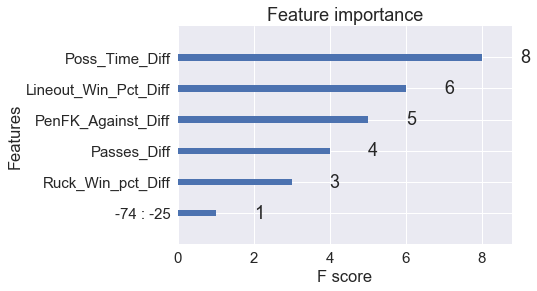

In [144]:
xgb.plot_importance(final_gb)

In [145]:
importances = final_gb.get_fscore()
importances

{'-74 : -25': 1,
 'Lineout_Win_Pct_Diff': 6,
 'Passes_Diff': 4,
 'PenFK_Against_Diff': 5,
 'Poss_Time_Diff': 8,
 'Ruck_Win_pct_Diff': 3}

In [146]:
testdmat = xgb.DMatrix(X_test, y_test)

In [147]:
from sklearn.metrics import accuracy_score
y_pred = final_gb.predict(testdmat) # Predict using our testdmat
y_pred

array([ 0.55055583,  0.36222729,  0.54875743,  0.51356804,  0.65300494,
        0.68655783,  0.51317465,  0.42307195,  0.48296693,  0.43283442,
        0.43243164,  0.70292139,  0.67027897,  0.60458958,  0.6352703 ,
        0.50926286,  0.43283442,  0.44277969,  0.59696484,  0.65300494,
        0.55929011,  0.56835306,  0.34267974,  0.52789211,  0.61272705,
        0.36222729,  0.51317465,  0.65238124,  0.60458958,  0.70292139,
        0.52577513,  0.49668893,  0.49388483,  0.34267974,  0.65536571,
        0.49297404,  0.41794661,  0.619672  ,  0.34267974,  0.44647565,
        0.49668893,  0.54707444,  0.50608599,  0.51809716,  0.54523569,
        0.49668893], dtype=float32)

In [148]:
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
y_pred

array([ 1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,
        1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,
        1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,
        0.,  0.,  1.,  1.,  1.,  1.,  0.], dtype=float32)

In [149]:
accuracy_score(y_pred, y_test), 1-accuracy_score(y_pred, y_test)

(0.54347826086956519, 0.45652173913043481)

**Accuracy is 54%**

### Predict Values using Validation Set

In [153]:
valdmat = xgb.DMatrix(X_val, y_val)

In [154]:
y_val_pred = final_gb.predict(valdmat) # Predict using our testdmat
y_val_pred

array([ 0.5513401 ,  0.42541432,  0.68655783,  0.45883197,  0.54523569,
        0.66967052,  0.34267974,  0.67027897,  0.54875743,  0.55788893], dtype=float32)

In [155]:
y_val_pred[y_val_pred > 0.5] = 1
y_val_pred[y_val_pred <= 0.5] = 0
y_val_pred

array([ 1.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.], dtype=float32)

In [157]:
accuracy_score(y_val_pred, y_val), 1-accuracy_score(y_val_pred, y_val)

(0.69999999999999996, 0.30000000000000004)

**Accuracy is 70%**